<p style="color:#F6F6F6;background-color:#4286F5;text-align:center;border-radius:10px 10px;font-weight:bold;font-size:22px"> LSTM Google Stocks EDA, Prediction & Forecasting <span style='font-size:28px; background-color:#F6F6F6 ;'></span></p>

<center><img src="https://images.unsplash.com/photo-1598522017610-edbea54edd64?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1636&q=80" 
             style='border-radius:10px'></center>

# Table Of Contents

## [<b>1. Disclaimer</b>](#1)
## [<b>2. Intro to The Google World</b>](#2)
## [<b>3. What are LSTMs</b>](#3)
## [<b>4. Load and Explore Stocks Dataset</b>](#4)
## [<b>5. Short EDA</b>](#5)
## [<b>6. Preprocessing</b>](#6)
## [<b>7. Compile Model</b>](#7)
## [<b>8. Model Evaluation</b>](#8)
## [<b>9. References</b>](#9)

<a id="1"></a> 

# <b>1 <span style='color:#4286F5'>|</span> Disclaimer</b>
**I am not an Expert in machine learning and it was my first time trying LSTMs so i researched learned and implemented them. Here I would like to mention Krish Naik, his tutorial helped me alot in understanding of LSTMs there is also a part of this notebook which was inspired from his tutorial. I short I have learned along the way I implemented everthing.**

> Without continual growth and progress, such words as improvement, achievement, and success have no meaning.




<a id="2"></a> 
# <b>2 <span style='color:#4286F5'>|</span> Intro to The Google World</b>

* Google LLC is an American multinational technology company that focuses on search engine technology, online advertising, cloud computing, computer software, quantum computing, e-commerce, artificial intelligence, and consumer electronics. 

* Google first electrified the online world by creating the Web's best search engine. The company's lightning-fast and mostly accurate search results put Google at the front of the search engine race – no small feat considering that search is the second-most common activity on the Internet, right after email use.

* The Android operating system is a mobile operating system that was developed by Google to be primarily used for touchscreen devices, cell phones, and tablets.


<a id="3"></a> 
# <b>3 <span style='color:#4286F5'>|</span> What are LSTMs</b>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/LSTM_Cell.svg/1200px-LSTM_Cell.svg.png">

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.

This is a behavior required in complex problem domains like machine translation, speech recognition, and more.

LSTMs are a complex area of deep learning. It can be hard to get your hands around what LSTMs are, and how terms like bidirectional and sequence-to-sequence relate to the field.

<a id="4"></a> 
# <b>4 <span style='color:#4286F5'>|</span> Load and Explore Stocks Dataset</b>

In [72]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

import colorama
from colorama import Fore, Style
warnings.simplefilter(action='ignore')
print(Fore.BLUE + "All Libraries Imported Successfully!")

All Libraries Imported Successfully!


In [18]:
color_pal = sns.color_palette('rocket')
plt.style.use('fivethirtyeight')
print(Fore.BLUE + "All Styles Set!")

All Styles Set!


In [19]:
df = pd.read_csv('../input/maama-companies-stock-price-20122022/GOOG.csv', index_col=[0])

In [20]:
df.head(5) # We can run head, tail and sample operation to get an idea of our dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-14,315.731567,317.734070,297.235901,299.078979,299.078979,18724522
2012-05-21,299.133759,306.695435,293.041595,294.660553,294.660553,29667989
2012-05-28,296.792542,298.446350,283.113831,284.423920,284.423920,21156204
2012-06-04,284.045319,292.847351,282.177338,289.141235,289.141235,20149845
2012-06-11,291.014221,291.567139,277.220917,281.200989,281.200989,26470046


In [21]:
df.tail(5) 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-30,2261.580078,2357.959961,2251.449951,2291.280029,2291.280029,6622800
2022-06-06,2334.850098,2387.969971,2217.219971,2228.550049,2228.550049,6360500
2022-06-13,2148.919922,2241.260010,2112.571045,2157.310059,2157.310059,8700600
2022-06-20,2194.040039,2372.750000,2185.870117,2370.760010,2370.760010,6336800
2022-06-24,2272.060059,2372.750000,2272.060059,2370.760010,2370.760010,1952513


In [22]:
df.dtypes # Date column must be of type Datetime and not an object. 

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [23]:
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")

In [24]:
df.sample(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-03-23,558.895569,573.016785,546.629211,546.838684,546.838684,9849468
2022-04-25,2388.590088,2465.560059,2262.485107,2299.330078,2299.330078,10831900
2017-11-13,1023.419983,1035.920044,1014.150024,1019.090027,1019.090027,5225800
2022-04-11,2658.000000,2658.783936,2542.229980,2545.060059,2545.060059,4510900
2013-01-28,374.476379,386.850006,371.876129,386.351868,386.351868,21053620


<a id="5"></a> 
# <b>5 <span style='color:#4286F5'>|</span> Short EDA</b>

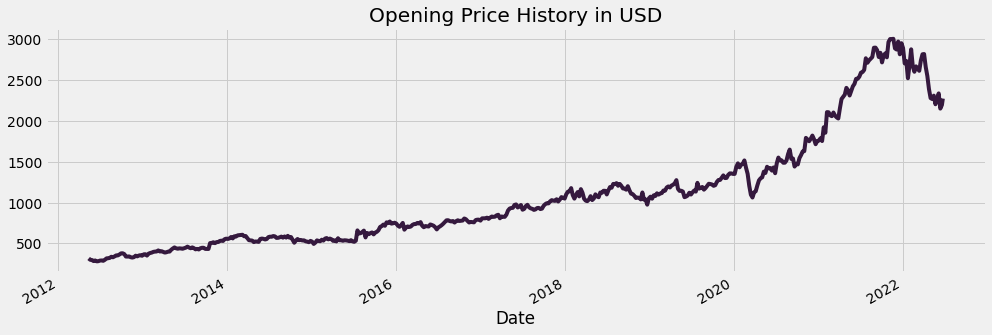

In [25]:
df['Open'].plot(figsize=(15, 5), lw=4, 
                color=color_pal[0],
                title='Opening Price History in USD')
plt.show()

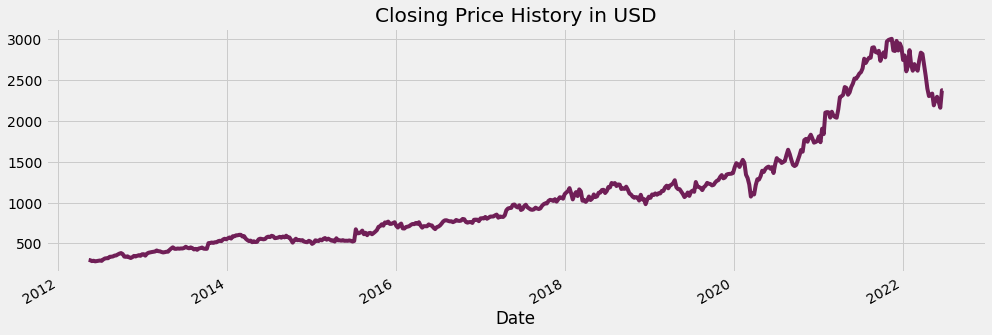

In [26]:
df['Close'].plot(figsize=(15, 5), lw=4, 
                color=color_pal[1],
                title='Closing Price History in USD')
plt.show()

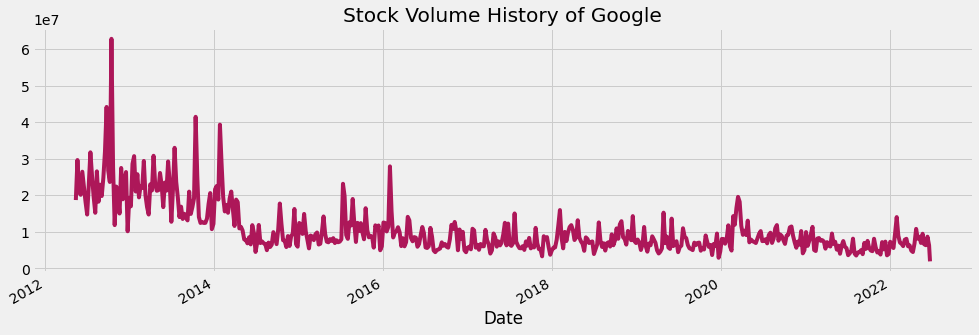

In [27]:
df['Volume'].plot(figsize=(15, 5), lw=4, 
                color=color_pal[2],
                title='Stock Volume History of Google')
plt.show()

<a id="6"></a> 
# <b>6 <span style='color:#4286F5'>|</span> Preprocessing</b>

In [28]:
data = df.reset_index()['Close']

In [29]:
data

0       299.078979
1       294.660553
2       284.423920
3       289.141235
4       281.200989
          ...     
524    2291.280029
525    2228.550049
526    2157.310059
527    2370.760010
528    2370.760010
Name: Close, Length: 529, dtype: float64

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1)) #Fitting MinMax Scaler b/w 0 and 1 on our data
data = scaler.fit_transform(np.array(data).reshape(-1, 1))

In [31]:
# Now we have to do train test split on our dataset
train_size = int(len(data)*0.70) # 70 persent of data will be our training data.
test_size = len(data)- train_size # So, what we are saying here is 100-70 will be our test data
train_data = data[0:train_size,:]
test_data = data[train_size:len(data),:1]

In [32]:
print(Fore.BLUE + "Train Data Size is", train_size)
print(Fore.BLUE + "Test Data Size is", test_size)

Train Data Size is 370
Test Data Size is 159


In [35]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step): 
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [36]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [39]:
print(Fore.BLUE + "X_train Shape is", X_train.shape)
print(Fore.BLUE + "y_train Shape is", y_train.shape)

X_train Shape is (269, 100)
y_train Shape is (269,)


In [40]:
print(Fore.BLUE + "X_test Shape is", X_test.shape)
print(Fore.BLUE + "y_test Shape is", y_test.shape)

X_test Shape is (58, 100)
y_test Shape is (58,)


In [41]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

<a id="7"></a> 
# <b>7 <span style='color:#4286F5'>|</span> Compile Model</b>

In [48]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(100,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100, 100)          40800     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 100)          80400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)              

In [50]:
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=25,batch_size=64,verbose=1)

Epoch 1/25
5/5 [==============================] - 13s 978ms/step - loss: 0.0201 - val_loss: 0.1119
Epoch 2/25
5/5 [==============================] - 2s 466ms/step - loss: 0.0045 - val_loss: 0.1414
Epoch 3/25
5/5 [==============================] - 2s 460ms/step - loss: 0.0032 - val_loss: 0.0825
Epoch 4/25
5/5 [==============================] - 2s 457ms/step - loss: 0.0023 - val_loss: 0.1208
Epoch 5/25
5/5 [==============================] - 2s 468ms/step - loss: 0.0017 - val_loss: 0.0267
Epoch 6/25
5/5 [==============================] - 2s 460ms/step - loss: 0.0012 - val_loss: 0.0343
Epoch 7/25
5/5 [==============================] - 2s 453ms/step - loss: 9.1072e-04 - val_loss: 0.0134
Epoch 8/25
5/5 [==============================] - 2s 458ms/step - loss: 7.3175e-04 - val_loss: 0.0134
Epoch 9/25
5/5 [==============================] - 3s 591ms/step - loss: 7.8362e-04 - val_loss: 0.0127
Epoch 10/25
5/5 [==============================] - 2s 465ms/step - loss: 7.7918e-04 - val_loss: 0.0192
Ep

In [54]:
print(hist.history.keys())

dict_keys(['loss', 'val_loss'])


In [56]:
hist_df = pd.DataFrame(hist.history, columns=['loss', 'val_loss']) 

In [58]:
hist_df.head()

,loss,val_loss
0,0.020061,0.111883
1,0.004545,0.141362
2,0.003236,0.082500
3,0.002294,0.120788
4,0.001668,0.026719


<a id="8"></a> 
# <b>8 <span style='color:#4286F5'>|</span> Model Evaluation</b>

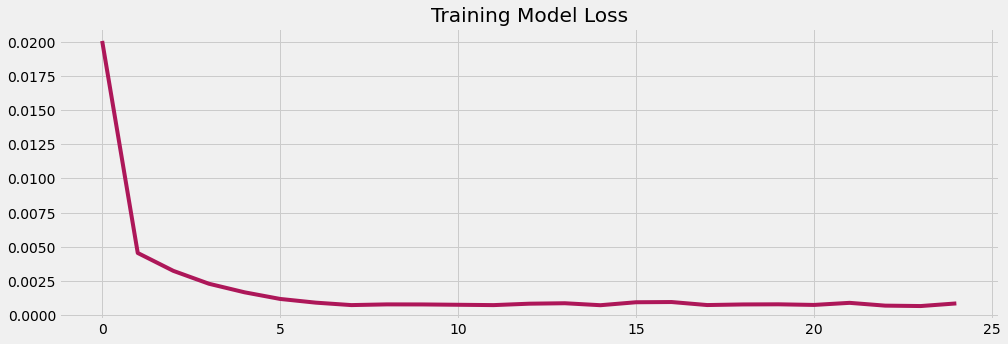

In [63]:
hist_df['loss'].plot(figsize=(15, 5), lw=4, 
                color=color_pal[2],
                title='Training Model Loss')
plt.show()

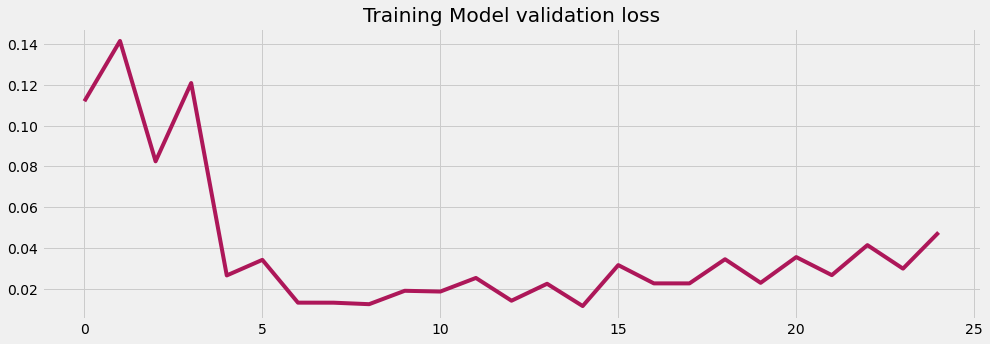

In [65]:
hist_df['val_loss'].plot(figsize=(15, 5), lw=4, 
                color= color_pal[2],
                title='Training Model validation loss')
plt.show()

In [73]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [74]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [75]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

821.8344279356307

In [77]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

2123.093493490738

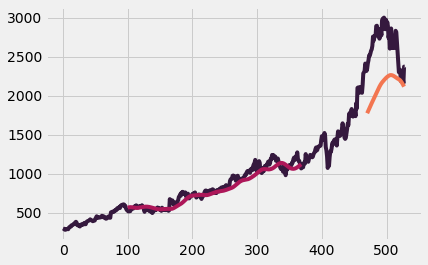

In [81]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data), color=color_pal[0])
plt.plot(trainPredictPlot, color=color_pal[2])
plt.plot(testPredictPlot, color=color_pal[4])
plt.show()

<a id="9"></a> 
# <b>9 <span style='color:#4286F5'>|</span> References</b>

Krish Naik  https://www.youtube.com/user/krishnaik06

Machine Learning Mastery  https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/

Wiki  https://en.wikipedia.org/wiki/Long_short-term_memory